# Stack Overflow Data - 2017 Survey

## Business Understanding

Stack OverFlow is a website used by the global development community. Through an online survey, it was possible to obtain a large base of information about the wishes of the developer community. Through this information I will be looking to understand how the feeling of the community is in relation to the programming language, salary and work.

## Question

Question 1. Happiness
Question 2. Happiness and salary
Question 3. Professional and happiness
Question 4. Language and happiness



# Data Understanding
## Imports necessary for first analisys

In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid")

import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%config IPCompleter.greedy=True

## Gather

#### Access and Explore

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## Analysis

In [3]:
# Lets see how is our data

In [4]:
df.shape

(51392, 154)

In [5]:
df.isna().sum()

Respondent                              0
Professional                            0
ProgramHobby                            0
Country                                 0
University                              0
EmploymentStatus                        0
FormalEducation                         0
MajorUndergrad                       8551
HomeRemote                           7384
CompanySize                         12470
CompanyType                         12569
YearsProgram                          247
YearsCodedJob                       10502
YearsCodedJobPast                   50418
DeveloperType                       15267
WebDeveloperType                    40696
MobileDeveloperType                 49839
NonDeveloperType                    46502
CareerSatisfaction                   8697
JobSatisfaction                     11016
ExCoderReturn                       50469
ExCoderNotForMe                     50471
ExCoderBalance                      50469
ExCoder10Years                    

### So many null data

In [6]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Only five numerical data

In [7]:
df.dtypes

Respondent                            int64
Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                  

#### Many object data, with many missing values.

# Analyse for Question

For this analysis we are looking for Jobsatisfaction. For our case, is necessary to use the colum JobSatisfaction.

In [8]:
df.JobSatisfaction.unique()

array([nan,  9.,  3.,  8.,  6.,  7.,  5.,  4., 10.,  2.,  0.,  1.])

## The range is so long, let  made cut for have only tree categorical

### We are use only tree categorical values
sad -> <=4

neutral -> >4 && <= 7

happy -> >7

In [9]:
df['JobSatisfactionCategorical'] = np.where(df.JobSatisfaction > 7, 'happy', 
         (np.where(df.JobSatisfaction > 4, 'neutral', 'sad')))

In [10]:
df[['JobSatisfactionCategorical','JobSatisfaction']].head(10)

,JobSatisfactionCategorical,JobSatisfaction
0,sad,NaN
1,sad,NaN
2,happy,9.0
3,sad,3.0
4,happy,8.0
5,sad,NaN
6,neutral,6.0
7,neutral,7.0
8,neutral,6.0
9,happy,8.0


In [11]:
## NAN values turned sad, is necessary remove NaN for not up the sad values

In [12]:
df = df.dropna(subset=['JobSatisfaction'], axis=0)

In [13]:
df[['JobSatisfactionCategorical','JobSatisfaction']].head(10)

,JobSatisfactionCategorical,JobSatisfaction
2,happy,9.0
3,sad,3.0
4,happy,8.0
6,neutral,6.0
7,neutral,7.0
8,neutral,6.0
9,happy,8.0
10,happy,9.0
11,neutral,6.0
13,neutral,6.0


## Question 1. Happiness

In [14]:
## Analisys

In [15]:
df.JobSatisfactionCategorical.value_counts()

happy      18704
neutral    16444
sad         5228
Name: JobSatisfactionCategorical, dtype: int64

In [16]:
## Visualize

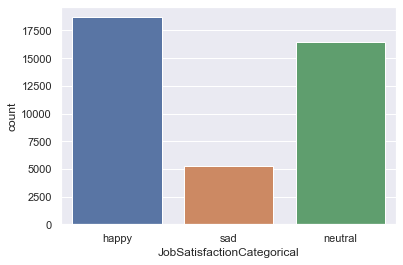

In [17]:
sns.countplot(x="JobSatisfactionCategorical", 
                   data=df, 
                  );

In [18]:
# Brief explanation for visualisation

### Many happy employers, huhuuuuu

## Question 2. Happiness and salary

### In describe the colum Salary have many values, and diference values. For our case and made one more easy analyse we are use mean for Salary

Lets made a division, salary mean

salary_mean > acima

salary_mean <= abaixo

In [19]:
# Analyse

In [20]:
 df.Salary.mean()

56213.749667010554

In [21]:
df['SalaryCategorical'] = np.where(df.Salary > df.Salary.mean(), 1, 0)

In [22]:
df.SalaryCategorical.value_counts()

0    34780
1     5596
Name: SalaryCategorical, dtype: int64

In [23]:
# Visualize

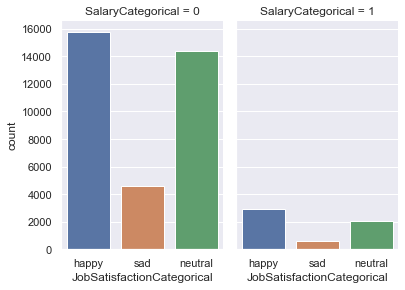

In [24]:
g = sns.catplot(x="JobSatisfactionCategorical", col="SalaryCategorical",
                data=df, kind="count",
                height=4, aspect=.7);

In [25]:
# Brief explanation for visualisation

## The salary does not interfere so much in the happiness of the employees

# Question 3. Professional and happiness

In [26]:
# Analyse

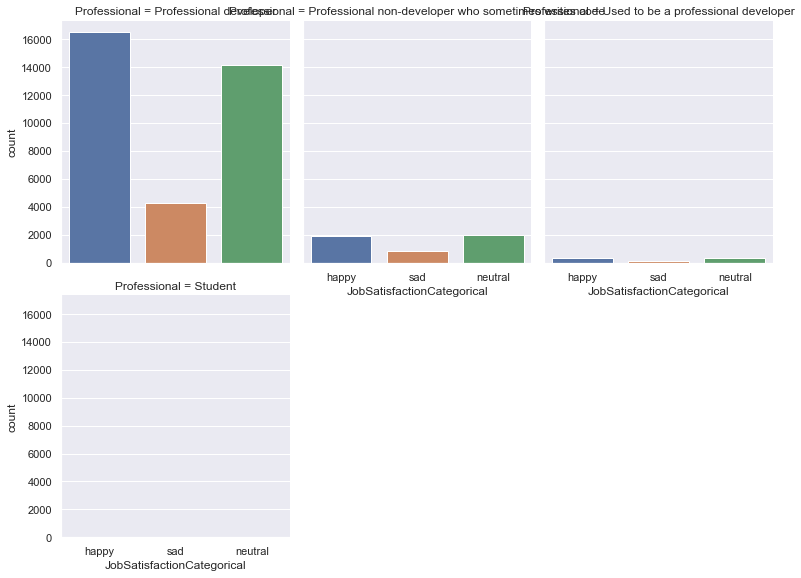

In [27]:
g = sns.catplot(x="JobSatisfactionCategorical", col="Professional",
                data=df, kind="count",
                height=4, aspect=.9, col_wrap=3);

In [28]:
# Brief explanation for visualisation

### The professional is happy too

# Question 4. Language and happiness

In [29]:
# Analyse

In [30]:
cols = ['HaveWorkedLanguage', 'WantWorkLanguage', 'JobSatisfactionCategorical', 'JobSatisfaction']
df2 = df[cols]

In [31]:
df2.shape

(40376, 4)

### for this analyse, we use count only. For this, no have a problem remove nan values

In [32]:
df2 = df2.dropna()

In [33]:
df2.shape

(27680, 4)

In [34]:
df2.head()

,HaveWorkedLanguage,WantWorkLanguage,JobSatisfactionCategorical,JobSatisfaction
2,Java; PHP; Python,C; Python; Rust,happy,9.0
3,Matlab; Python; R; SQL,Matlab; Python; R; SQL,sad,3.0
6,Matlab; Python,JavaScript; Julia; Matlab; Python; R; SQL,neutral,6.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Clojure; Elixir; Haskell; Scala,neutral,7.0
8,C#; JavaScript,F#; Go,neutral,6.0


In [35]:
def worked_language_happiness(df, top, col_list_language, col_job_satisfaction):
    """
    INPUT
    df -> dataframe for analysis with columns [Workedlanguage, Jobsatisfaction]
    top -> int for numbers of data show in end
    col_list_language -> col from df, with string sep ; language
    col_job_satisfaction -> col with float of jobstisfaction
    OUTPUT
    dataframe top languages
    """
    dict_professional = {}
    for index, row in df2.iterrows():
            temp_value = row[col_list_language].split(";")
            list_temp = [x.strip(' ') for x in temp_value]
            for value in list_temp:
                if value in dict_professional.keys():
                    mean = dict_professional[value]
                    mean = (mean + row[col_job_satisfaction]) / 2
                else:
                    dict_professional[value] = row[col_job_satisfaction]
    data = {'Language': dict_professional.keys(), 'Mean': dict_professional.values()}
    df_3 = pd.DataFrame.from_dict(data)
    df_3['Mean'] = df_3['Mean'].astype(int)
    df_3['meanCategorical'] = np.where(df_3['Mean'] > 7, 'happy', 
             (np.where(df_3['Mean'] > 4, 'neutral', 'sad')))
    
    return df_3

In [36]:
# Visualise
# analise for HaveWorkedLanguage

In [37]:
df_3 = worked_language_happiness(df2, 10, 'HaveWorkedLanguage', 'JobSatisfaction')
df_3.sort_values('Mean', ascending = False).head(10)

,Language,Mean,meanCategorical
33,Julia,10,happy
31,Common Lisp,10,happy
0,Java,9,happy
2,Python,9,happy
25,Lua,9,happy
23,F#,9,happy
1,PHP,9,happy
15,Swift,8,happy
24,TypeScript,8,happy
21,Perl,8,happy


## Seriously? Julia, what a thing. But the calculation takes into account only the average.

In [38]:
# Visualise
# analise for HaveWorkedLanguage

In [39]:
df_3 = worked_language_happiness(df2, 10, 'WantWorkLanguage', 'JobSatisfaction')
df_3.sort_values('Mean', ascending = False).head(10)

,Language,Mean,meanCategorical
0,C,9,happy
2,Rust,9,happy
26,Lua,9,happy
1,Python,9,happy
14,C#,8,happy
25,PHP,8,happy
24,Hack,8,happy
23,Perl,8,happy
22,TypeScript,8,happy
21,VB.NET,8,happy


## C, Python is in everywhere

## Conclusion

### The number of people satisfied with working with development is very large, it is not possible to see any very expressive bar in the graphics. This is good, it would be better if happiness was always greater than sad.
### About the programming language, the values ​​10 were curious, but the values ​​9 are well spread out. 

### Check my blog post for this analysis: https://andrezio.medium.com/happiness-and-programming-language-fe52c0bcdd03

# Acknowledgments

For all Stackoverflow developers who have contributed to this incredible database.